In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
tf.enable_eager_execution()

/home/malzantot/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from syn_dataset import SynDataset
from data_utils import DataFactory

/home/malzantot/Nesl/bio_gan/ecg_dataset.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/malzantot/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/malzantot/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/malzantot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/malzantot/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/malzantot/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loo

In [3]:
dataset_name = 'ecg_long'
fake_data = [
    ('samples/ecg_rvae_mle/07_22_14_40', 'CVRAE'),
    ('samples/ecg_rgan_adv/07_23_21_30', 'RGAN'),
    ('samples/ecg_crgan_adv/07_22_16_41', 'RGAN-AR'),
    ('samples/ecg_rvae_adv/07_22_14_39', 'PhisyoGAN')
]

In [4]:
def plot_samples(dset_name, fake_result, plots_per_class = 1, row_width=4, fontsize=24):
    real_train, real_test, metadata = DataFactory.create_dataset(dataset_name)
    real_data = real_test.shuffle(1000).batch(100)
    fake_data = [SynDataset(fake_path).to_dataset().shuffle(1000).batch(100) for fake_path, fake_name in fake_result]
    
    
    num_cols = metadata.num_labels * plots_per_class
    num_rows = len(fake_result)+1
    
    all_data = [real_data] + fake_data
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*row_width, (num_rows*row_width)))
    for i in range(num_rows):
        batch_x, batch_y = next(iter(all_data[i]))
        batch_x = batch_x.numpy()
        batch_y = batch_y.numpy()
        cur_color = 'b' if i == 0 else 'r'
        for j in range(metadata.num_labels):
            cur_idx = 0
            for k in range(plots_per_class):
                cur_col = j*plots_per_class+k
                while (batch_y[cur_idx] != j):
                    cur_idx += 1
                axes[i][cur_col].plot(batch_x[cur_idx,:,:], color=cur_color)
                #axes[i][cur_col].set_title('{}'.format(cur_idx))
                cur_idx += 1
                axes[i][cur_col].set_ylim(-0.25, 0.35)
                #axes[i][cur_col].set_yticks([])
                #axes[i][cur_col].set_xticks([])
                
                if cur_col == 0:
                    if i == 0:
                        axes[i][cur_col].set_ylabel('Real', fontsize=fontsize)                        
                    else:
                        axes[i][cur_col].set_ylabel(fake_result[i-1][1], fontsize=fontsize)

                if i == 0:
                    axes[i][cur_col].set_title(metadata.class_names[j], fontsize=fontsize)
                    
    plt.tight_layout()
    return fig



['1 NSR', '4 AFIB']
['1 NSR', '4 AFIB']
(array([0, 1], dtype=int32), array([211, 102]))
['1 NSR', '4 AFIB']
['1 NSR', '4 AFIB']
(array([0, 1], dtype=int32), array([72, 33]))
Instructions for updating:
Colocations handled automatically by placer.


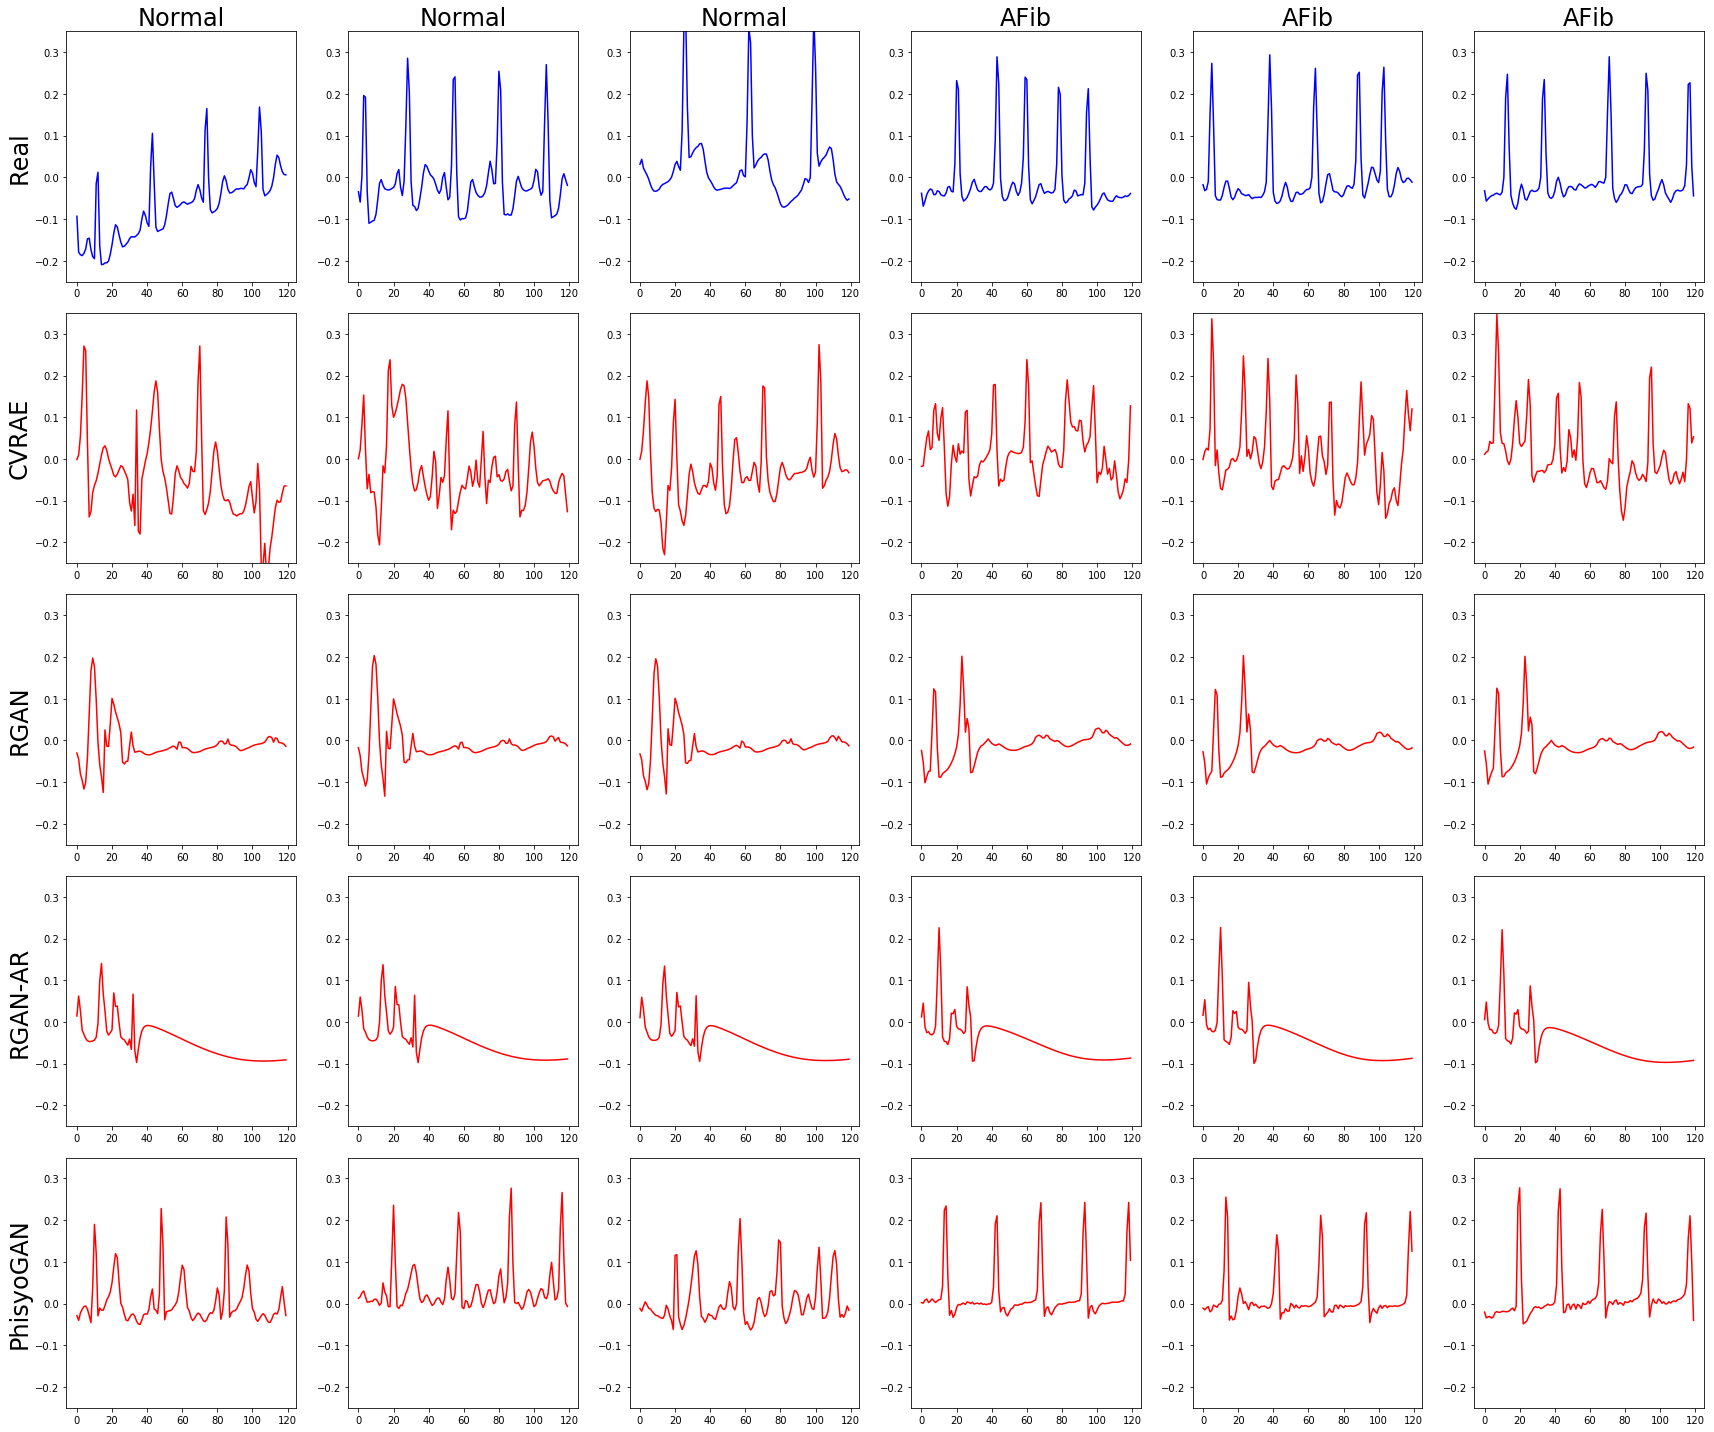

In [5]:
fig = plot_samples(dataset_name, fake_data, plots_per_class=3)
fig.savefig('ecg_long_result.png')